In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium
from folium import plugins
import datetime as dt

%matplotlib inline 
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

# Import data

In [2]:
df = pd.read_csv('data/incidenti_2007_2016.csv')

/Users/edoardoventurini/Envs/python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df['DataOraIncidente'] = df['DataOraIncidente'].apply(lambda d: pd.to_datetime(d))

In [8]:
df['DataOraIncidente_year'] = df['DataOraIncidente'].apply(lambda d: d.year)
df['DataOraIncidente_month'] = df['DataOraIncidente'].apply(lambda d: d.month)
df['DataOraIncidente_day'] = df['DataOraIncidente'].apply(lambda d: d.day)

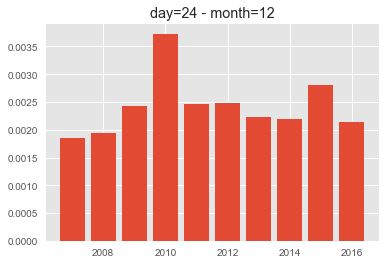

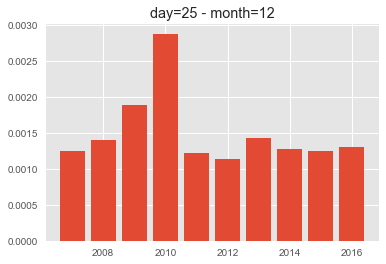

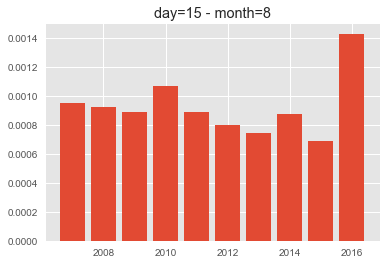

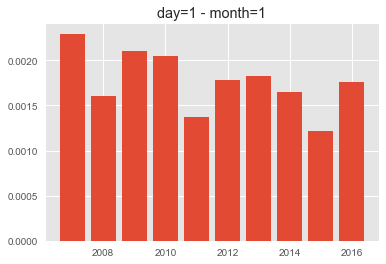

In [32]:

for d,m in [(24,12), (25,12), (15,8), (1,1)]:
    #print(d,m)
    values = []
    for y in range(2007,2016+1):
        df_year = df[df['DataOraIncidente_year']==y].copy()
        perc = len(df_year[(df_year['DataOraIncidente_month']==m) & \
                            (df_year['DataOraIncidente_day']==d)])/len(df_year)
        values.append((y,perc))
    plt.bar([x[0] for x in values],
            [x[1] for x in values])
    plt.title('day={} - month={}'.format(d,m))
    plt.show()